In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
!pip install tensorflow==2.15.0

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


Importing the Dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
# set up kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:14<00:00, 38.6MB/s]
100% 2.04G/2.04G [00:14<00:00, 148MB/s] 


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#unzipp the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Cedar_apple_rust', 'Apple___Black_rot', 'Potato___Late_blight', 'Peach___healthy', 'Apple___Apple_scab']
38
['Apple___Cedar_apple_rust', 'Apple___Black_rot', 'Potato___Late_blight', 'Peach___healthy', 'Apple___Apple_scab']
38
['Apple___Cedar_apple_rust', 'Apple___Black_rot', 'Potato___Late_blight', 'Peach___healthy', 'Apple___Apple_scab']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['d9399e07-dc4e-4c86-af6d-a74a4bccc089___Mt.N.V_HL 8984.JPG', '55685d56-48af-4d1e-9fb1-f4f1c46bdd61___Mt.N.V_HL 9052.JPG', '57bd569d-38f1-495d-b290-cdf4dbbbebf8___Mt.N.V_HL 8964.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', '8d435543-bb52-4a00-a84a-02404010cb33___Mt.N.V_HL 9061.JPG']


Data preprocessing


In [ ]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


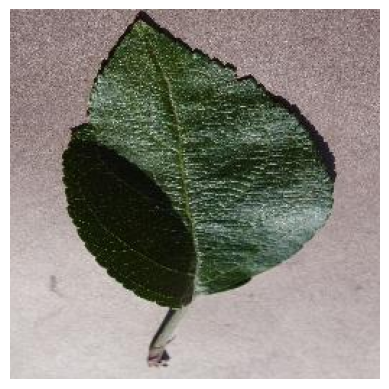

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG'

# read the imge
img=mpimg.imread(image_path)

print(img.shape)

#display the image
plt.imshow(img)
plt.axis('off') #turn of ais numbers
plt.show()


In [ ]:
# Image parameters
img_size = 224
batch_size = 32

In [ ]:
# Image data generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2  # use 20% of data for validation

)

In [ ]:
# Train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)



Found 43456 images belonging to 38 classes.


In [ ]:
# Validation generator
Validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional  Neural Network

In [ ]:
# model definition
model =models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation = 'relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [ ]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model Training

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs= 5,
    validation_data = Validation_generator,
    validation_steps = Validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 [==============================] - 2251s 2s/step - loss: 1.0633 - accuracy: 0.7024 - val_loss: 0.4816 - val_accuracy: 0.8515
Epoch 2/5
1358/1358 [==============================] - 2261s 2s/step - loss: 0.3455 - accuracy: 0.8911 - val_loss: 0.4102 - val_accuracy: 0.8751
Epoch 3/5
1358/1358 [==============================] - 2186s 2s/step - loss: 0.1590 - accuracy: 0.9479 - val_loss: 0.4919 - val_accuracy: 0.8609
Epoch 4/5
1358/1358 [==============================] - 2308s 2s/step - loss: 0.0969 - accuracy: 0.9680 - val_loss: 0.5526 - val_accuracy: 0.8563
Epoch 5/5
1358/1358 [==============================] - 2306s 2s/step - loss: 0.0753 - accuracy: 0.9762 - val_loss: 0.5682 - val_accuracy: 0.8728


In [ ]:
#model evaluation
print("Evaluating model...........")
val_loss, val_accuracy = model.evaluate(Validation_generator, steps= Validation_generator.samples // batch_size)
print(f"Validation Accuracy :{val_accuracy*100:.2f}%")

Evaluating model...........
339/339 [==============================] - 143s 421ms/step - loss: 0.5682 - accuracy: 0.8728
Validation Accuracy :87.28%


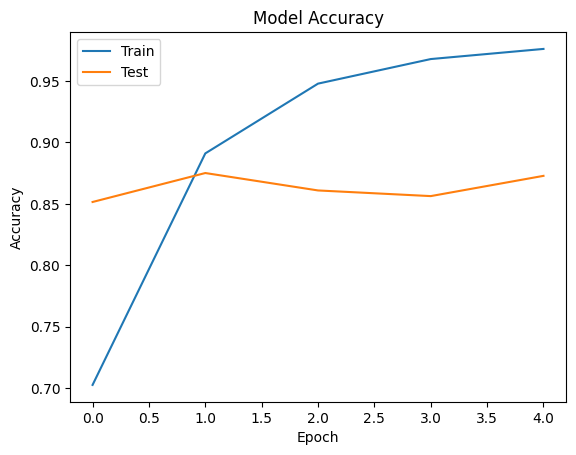

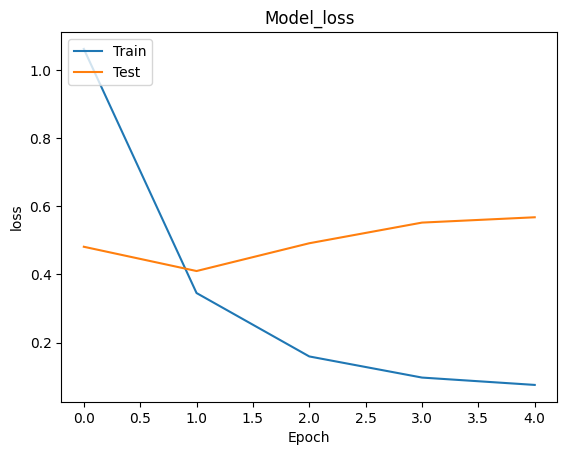

In [ ]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc ='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc ='upper left')
plt.show()


Building a predictive system

In [ ]:
# Function to load and preprocesses the image using pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  #Load the image
  img = Image.open(image_path)

  #resize the image
  img = img.resize(target_size)

  #convertthe image to a numpy array
  img_array = np.array(img)

  #add batch Dimension
  img_array = np.expand_dims(img_array, axis=0)

  #scale the image values to [0,1]
  img_array = img_array.astype('float32') / 255,
  return img_array

  #function to predict the class of an image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)

    # Make sure index is an int, not np.int64
    predicted_class_index = int(np.argmax(predictions, axis=1)[0])

    # Safely get class name
    predicted_class_name = class_indices.get(predicted_class_index, "Unknown class")

    return predicted_class_name

In [ ]:
#create a mapping from class indicess to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#Example usage
image_path ='/content/plantvillage dataset/color/Tomato___healthy/45b3e6ad-f79c-4132-9bb5-9e9d26cbdfce___RS_HL 9908.JPG'
predicted_class_name= predict_image_class(model, image_path, class_indices)

# output the result
print("predicted class name:" ,predicted_class_name)


1/1 [==============================] - 1s 584ms/step
predicted class name: Tomato___healthy


In [ ]:
model.save('drive/MyDrive/plant desises/plant_disease_prediction_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/drive/MyDrive/plant_disease_model.keras')

In [ ]:
import json

# Assuming you have already mounted Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Save JSON to Google Drive
json_path = 'drive/MyDrive/plant desises/class_indices.json'
with open(json_path, 'w') as f:
    json.dump(class_indices, f)


In [ ]:
model.save('/content/drive/MyDrive/plant desises/plant_disease_prediction_model.h5')

In [ ]:
# List files in the target folder
!ls '/content/drive/MyDrive/plant desises'


class_indices.json  plant_disease_prediction_model.h5


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Create the folder (if it doesn't exist)
!mkdir -p '/content/gdrive/MyDrive/plant_diseases'



In [ ]:
# Save the model as HDF5 format (legacy format, still fine)
model.save('/content/gdrive/MyDrive/plant_diseases/plant_disease_prediction_model.h5')


In [ ]:
import json

# Assuming you have already mounted Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Save JSON to Google Drive
json_path = '/content/gdrive/MyDrive/plant_diseases/class_indices.json'
with open(json_path, 'w') as f:
    json.dump(class_indices, f)